# Question 4 
### (Making Decisions using Bayes Decision Rule (Part II))
Following the previous problem, here we are going to face a more complicated case, where
covariance matrices belonging to each classes are not identical. <br>
In this problem, X is a two dimensional feature vector and $p(x|\omega_i) \sim N (\mu_i, \Sigma_i) , i=1,2$ as its class conditional distribution where $\mu_i = [2,3]^T, \mu_2=[0, -2]^T, \Sigma_1 = [[2,-0.8],[-0.8, 2]] $ and $\Sigma_2 = [[1, 0.2],[0.2, 1]]$






In [4]:
import random
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
# import pandas as pd
# import pandas

import numpy as np
from numpy.linalg import inv
# import seaborn as sns
from scipy.stats import multivariate_normal
from numpy import linalg 
np.set_printoptions(suppress=True)


#### a)Sketch the contours of constant values for two class conditional densities.

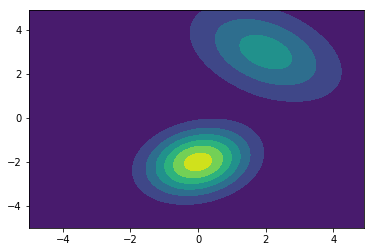

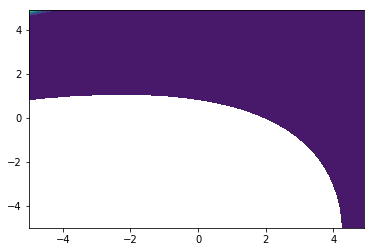

In [17]:
x,y = np.mgrid[-5:5: 0.1, -5: 5: 0.1]
xy = np.vstack((x.flatten(), y.flatten())).T
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y


probability_contours = [0.08, 0.04, 0.02, 0.01]
mu_1 = np.array([2,3])
mu_2 = np.array([0, -2])
cov_1 = np.array([[2,-0.8],[-0.8, 2]])
cov_2 = np.array([[1, 0.2],[0.2, 1]])

sigma_1 = cov_1
sigma_2= cov_2

rv1 = multivariate_normal(mu_1, cov_1)
# plt.contourf(x,y,rv1.pdf(pos),)
plt.show()
rv2 = multivariate_normal(mu_2, cov_2)
plt.contourf(x,y,(rv1.pdf(pos))+rv2.pdf(pos))
plt.show()
plt.contourf(x,y,(rv1.pdf(pos)/rv2.pdf(pos)-1))
plt.show()

    

#### b) Sketch the decision boundary for Bayesian classifier and minimum distance classifier.

Bayesian Classifier


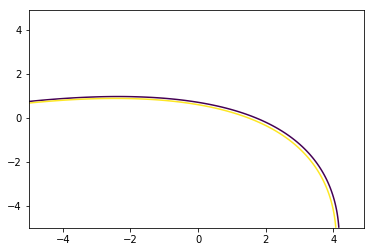

Minimum Distance Classifier


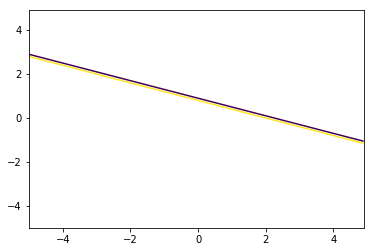

In [6]:
def d_squared (xy, sigma_1, mu_1, sigma_2, mu_2):
    matrix = inv(sigma_1)
    a = xy - mu_1
    t = np.matmul(a,matrix)
    t2 = np.matmul(t, a.T)
    matrix = inv(sigma_2)
    a = xy - mu_2
    t = np.matmul(a,matrix)
    t3 = np.matmul(t, a.T)
    return t2-t3
    # if t2-t3>=0:
    #     return 1
    # else:
    #     return 0
    
print ("Bayesian Classifier")
Z = np.apply_along_axis(func1d = d_squared, axis= 1, arr = xy, sigma_1=sigma_1,
                        mu_1 = mu_1, sigma_2=sigma_2, mu_2=mu_2)
Z = np.reshape(Z, (len(x), -1))
plt.contour(x,y,Z, levels=[0,1])
plt.show()
print ("Minimum Distance Classifier")
I = np.array([[1,0],[0,1]])
Z = np.apply_along_axis(func1d = d_squared, axis= 1, arr = xy, sigma_1=I,
                        mu_1 = mu_1, sigma_2=I, mu_2=mu_2)
Z = np.reshape(Z, (len(x), -1))
plt.contour(x,y,Z, levels=[0,1])
plt.show()

#### c) Generate 1000 samples for each class and estimate the classification error for each classifier.
    

In [7]:
sample_class_0 = np.random.multivariate_normal(mu_1, sigma_1, 1000)
sample_class_1 = np.random.multivariate_normal(mu_2, sigma_2, 1000)
error=0

Z = np.apply_along_axis(func1d = d_squared, axis= 1, arr = sample_class_0, sigma_1=I,
                        mu_1 = mu_1, sigma_2=I, mu_2=mu_2)
for i in range(0, len(Z)):
    if (Z[i]>0):
        error+=1
Z = np.apply_along_axis(func1d = d_squared, axis= 1, arr = sample_class_1, sigma_1=I,
                        mu_1 = mu_1, sigma_2=I, mu_2=mu_2)
for i in range(0, len(Z)):
    if (Z[i]<=0):
        error+=1
print ("error for minimum distance classified:", error/2000)

error=0

Z = np.apply_along_axis(func1d = d_squared, axis= 1, arr = sample_class_0, sigma_1=sigma_1,
                        mu_1 = mu_1, sigma_2=sigma_2, mu_2=mu_2)
for i in range(0, len(Z)):
    if (Z[i]>0):
        error+=1
Z = np.apply_along_axis(func1d = d_squared, axis= 1, arr = sample_class_1, sigma_1=sigma_1,
                        mu_1 = mu_1, sigma_2=sigma_2, mu_2=mu_2)
for i in range(0, len(Z)):
    if (Z[i]<=0):
        error+=1
print ("error for bayesian classified:", error/2000)


error for minimum distance classified: 0.012
error for bayesian classified: 0.011


#### d) Considering the following cost matrix, find the decision boundary for Bayes classifier and compare f-score for generated samples with Bayes classifier in part b.

Now the decision function would be $(x-\mu)^T\Sigma_1(x-\mu_1) - (x-\mu_2)(\Sigma_2)(x-\mu_2) - ln(3) \geq 0 $

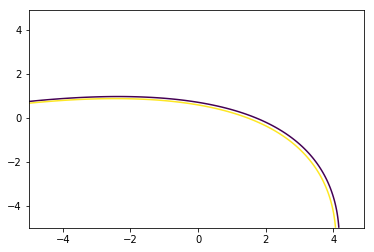

In [16]:
Z = np.apply_along_axis(func1d = d_squared, axis= 1, arr = xy, sigma_1=sigma_1,
                        mu_1 = mu_1, sigma_2=sigma_2, mu_2=mu_2)
Z = np.reshape(Z, (len(x), -1))
plt.contour(x,y,Z, levels=[0, np.log(3)])
plt.show()

In [25]:
t = 100
Z = np.apply_along_axis(func1d = d_squared, axis= 1, arr = sample_class_0, sigma_1=sigma_1,
                        mu_1 = mu_1, sigma_2=sigma_2, mu_2=mu_2)
tp=fp=tn=fn=0

for i in range(0, len(Z)):
    if (Z[i]>np.log(t)):
        fp+=1
    else:
        tp+=1
Z = np.apply_along_axis(func1d = d_squared, axis= 1, arr = sample_class_1, sigma_1=sigma_1,
                        mu_1 = mu_1, sigma_2=sigma_2, mu_2=mu_2)
for i in range(0, len(Z)):
    if (Z[i]<=np.log(t)):
        fn+=1
    else:
        tn+=1
precision = tp/(tp+fp)
recall = tp/(tp+fn)
print ("f-score for weighted costs:", 2*(precision*recall)/(precision+recall))

Z = np.apply_along_axis(func1d = d_squared, axis= 1, arr = sample_class_0, sigma_1=sigma_1,
                        mu_1 = mu_1, sigma_2=sigma_2, mu_2=mu_2)
tp=fp=tn=fn=0

for i in range(0, len(Z)):
    if (Z[i]>0):
        fp+=1
    else:
        tp+=1
Z = np.apply_along_axis(func1d = d_squared, axis= 1, arr = sample_class_1, sigma_1=sigma_1,
                        mu_1 = mu_1, sigma_2=sigma_2, mu_2=mu_2)
for i in range(0, len(Z)):
    if (Z[i]<=0):
        fn+=1
    else:
        tn+=1
precision = tp/(tp+fp)
recall = tp/(tp+fn)
print ("f-score for normal costs:", 2*(precision*recall)/(precision+recall))

f-score for weighted costs: 0.9750367107195301
f-score for normal costs: 0.9890329012961117


There is no significant difference between f-scores. 

In [112]:
number_of_times=20
dis=[]
bay=[]
for kk in range(0, number_of_times):
    sample_class_0 = np.random.multivariate_normal(mu_1, sigma_1, 1000)
    sample_class_1 = np.random.multivariate_normal(mu_2, sigma_2, 1000)
    error=0
    
    Z = np.apply_along_axis(func1d = d_squared, axis= 1, arr = sample_class_0, sigma_1=I,
                            mu_1 = mu_1, sigma_2=I, mu_2=mu_2)
    for i in range(0, len(Z)):
        if (Z[i]>0):
            error+=1
    Z = np.apply_along_axis(func1d = d_squared, axis= 1, arr = sample_class_1, sigma_1=I,
                        mu_1 = mu_1, sigma_2=I, mu_2=mu_2)
    for i in range(0, len(Z)):
        if (Z[i]<=0):
            error+=1
    dis.append(error/2000)
    # print ("error for minimum distance classified:", error/2000)
    
    error=0
    
    Z = np.apply_along_axis(func1d = d_squared, axis= 1, arr = sample_class_0, sigma_1=sigma_1,
                            mu_1 = mu_1, sigma_2=sigma_2, mu_2=mu_2)
    for i in range(0, len(Z)):
        if (Z[i]>0):
            error+=1
    Z = np.apply_along_axis(func1d = d_squared, axis= 1, arr = sample_class_1, sigma_1=sigma_1,
                            mu_1 = mu_1, sigma_2=sigma_2, mu_2=mu_2)
    for i in range(0, len(Z)):
        if (Z[i]<=0):
            error+=1
    bay.append(error/2000)
    # print ("error for bayesian classified:", error/2000)
print ("bayes error average", np.average(np.asarray(bay)))
print ("min dist average", np.average(np.asarray(dis)))

bayes error average 0.007975000000000001
min dist average 0.009875


On average, bayes classifier works a little better here (for this dataset). <br>
